In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as s

### Heatmaps of main results

In [48]:
resultsfile = '../results/Bacteria_DNA_results.csv'
df = pd.read_csv(resultsfile)
df.head()

,positive label,label tax group,pool label,pool tax group,Baltimore,N in class,Features,k,AUC
0,Alteromonadales,order,Gammaproteobacteria,class,DNA,30,DNA,1,0.516
1,Alteromonadales,order,Gammaproteobacteria,class,DNA,30,DNA,2,0.922
2,Alteromonadales,order,Gammaproteobacteria,class,DNA,30,DNA,3,1.000
3,Alteromonadales,order,Gammaproteobacteria,class,DNA,30,DNA,4,1.000
4,Alteromonadales,order,Gammaproteobacteria,class,DNA,30,DNA,5,0.984


In [49]:
df.rename(columns = {'label tax group':'tax', 'positive label':'label' }, inplace=True)
df.drop(columns= [ 'pool label', 'pool tax group'], inplace =True)
correct_b = lambda row:'dsDNA' if row['Baltimore']== 'DNA' else row['Baltimore']
df['Baltimore']= df.apply(correct_b , axis=1)


con = lambda row :f'{row["label"]}_{row["Baltimore"]}' 
df['Dataset'] = df.apply ( con, axis =1)

fs = lambda row: f'{row["Features"]}_{row["k"]}'
df['Feature set'] = df.apply(fs,axis = 1)

tax_order =['kingdom','phylum','class','order','family','genus','species']
df['tax'] = df['tax'].astype('category')
df['tax'].cat.set_categories(tax_order, inplace=True)
fs_order =['DNA_1','DNA_2','DNA_3','DNA_4','DNA_5','DNA_6','DNA_7','DNA_8','DNA_9','AA_1','AA_2','AA_3','AA_4','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Domains_0']
df['Feature set'] = df['Feature set'].astype('category')
df['Feature set'].cat.set_categories(fs_order, inplace=True)

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 9 columns):
label          1340 non-null object
tax            1340 non-null category
Baltimore      1340 non-null object
N in class     1340 non-null int64
Features       1340 non-null object
k              1340 non-null int64
AUC            1340 non-null float64
Dataset        1340 non-null object
Feature set    1340 non-null category
dtypes: category(2), float64(1), int64(2), object(4)
memory usage: 77.2+ KB


length 100
length 100
length 200
length 240
length 420
length 280


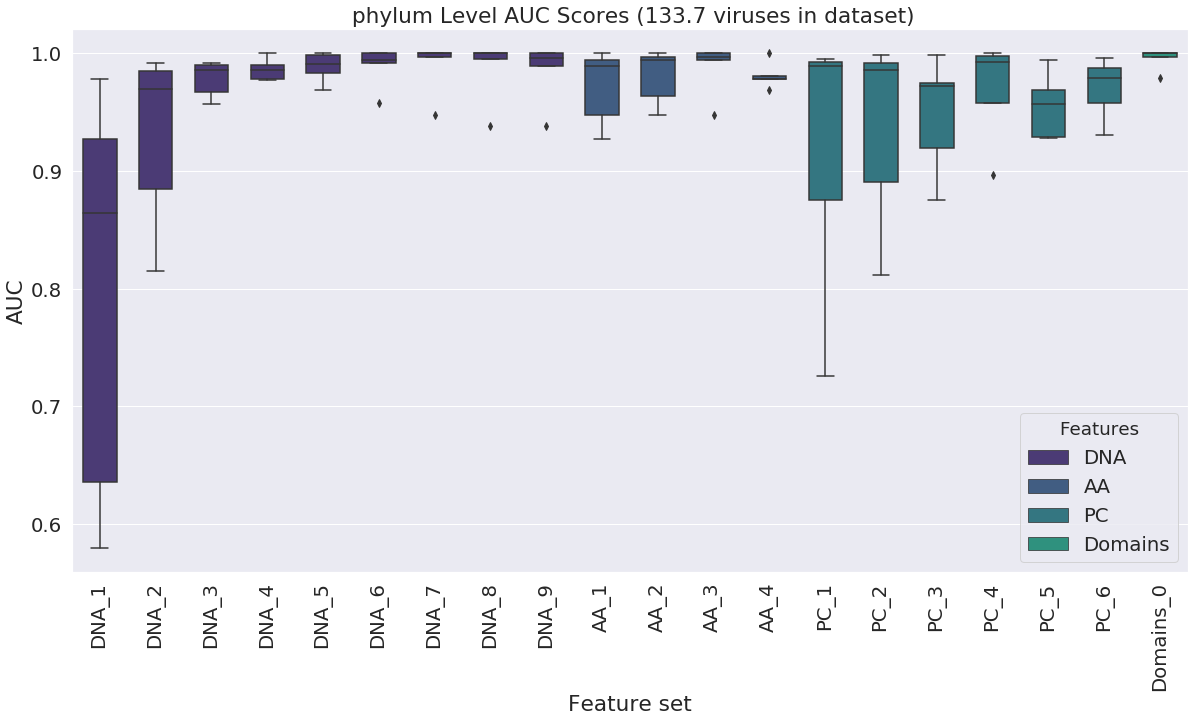

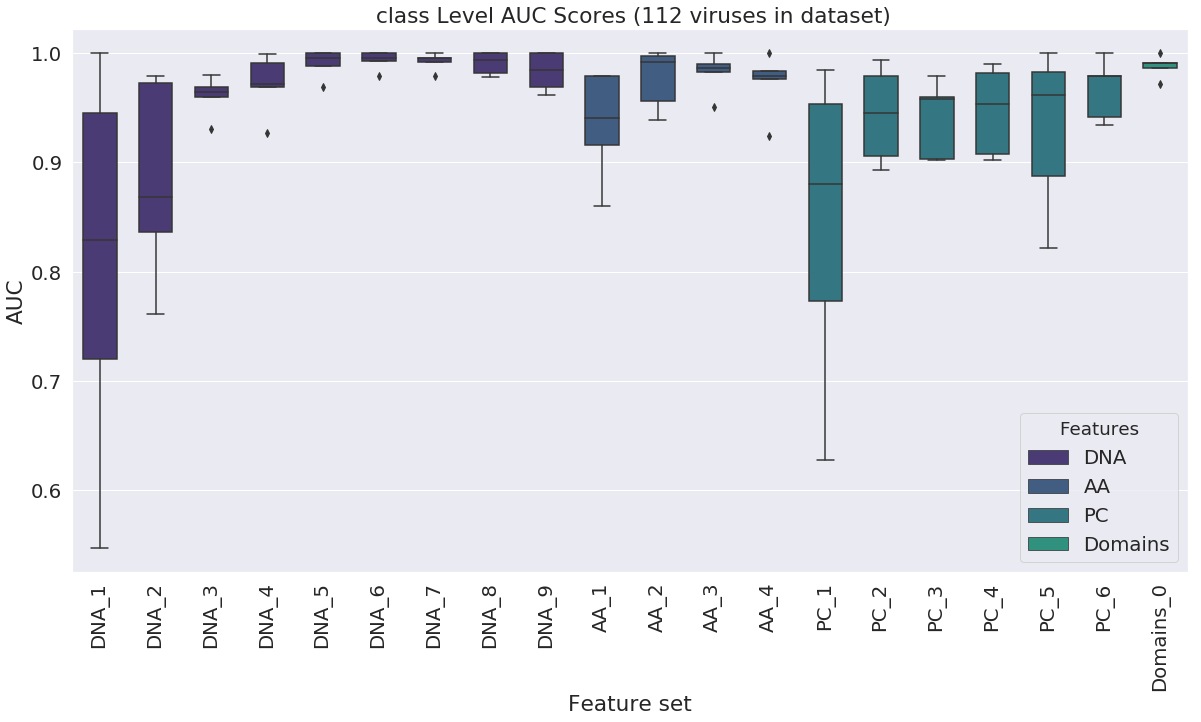

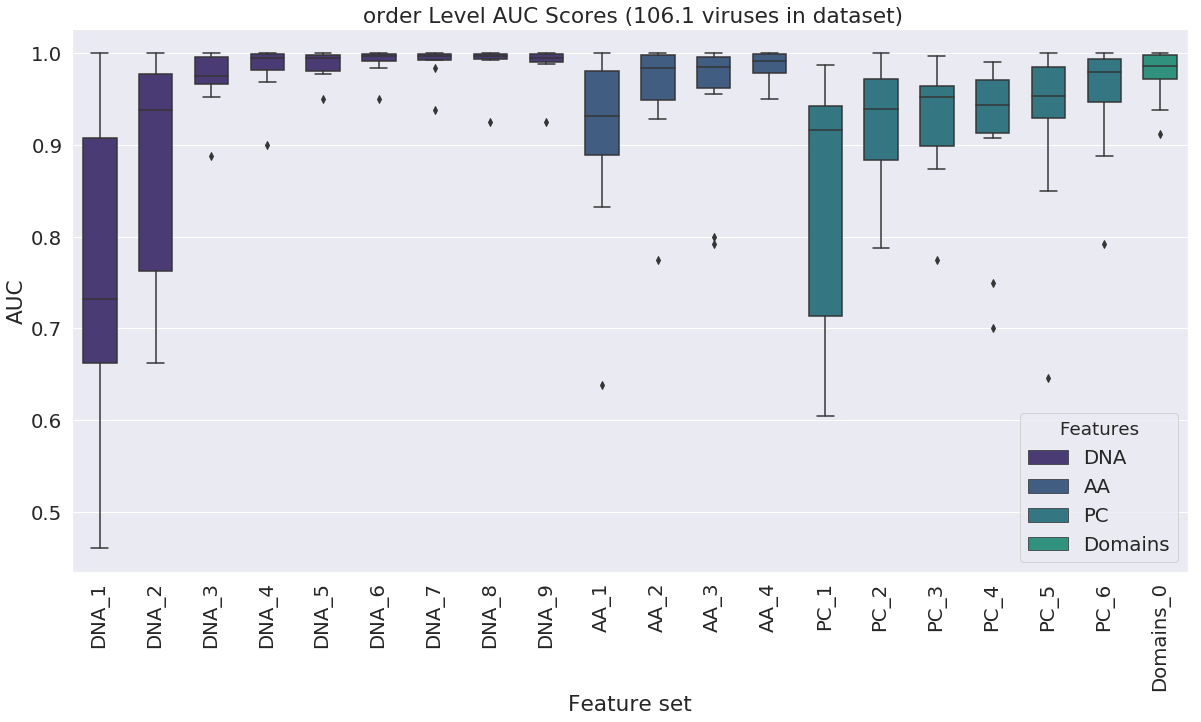

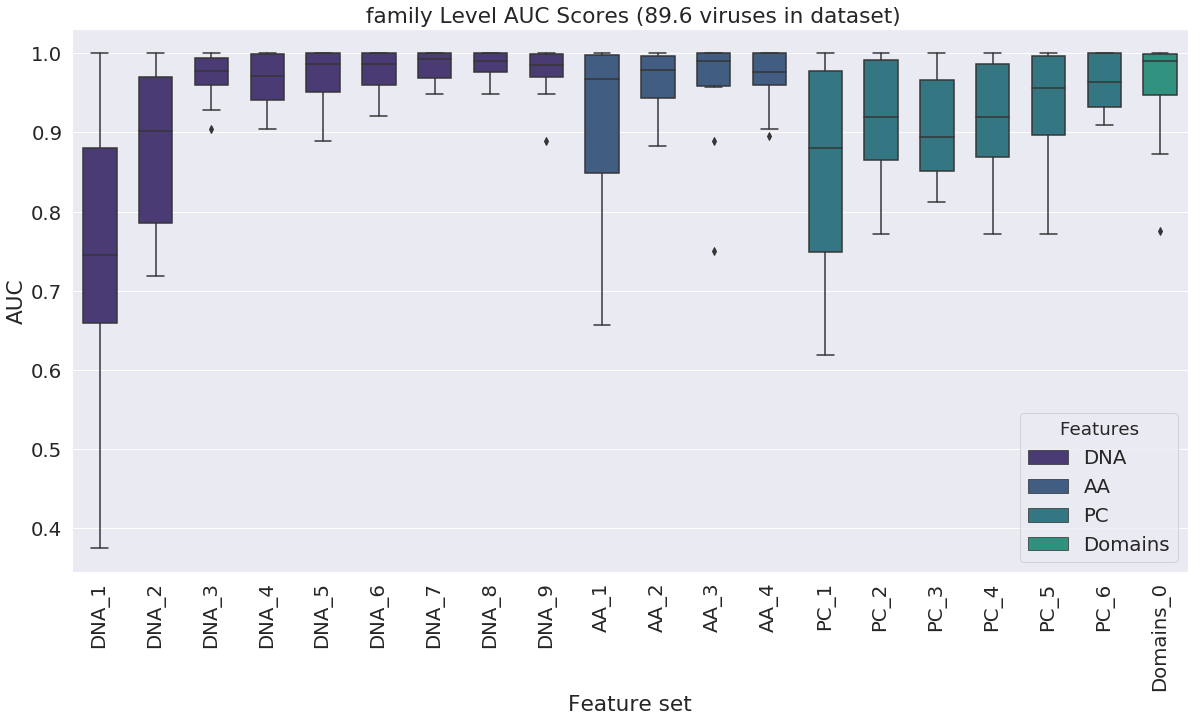

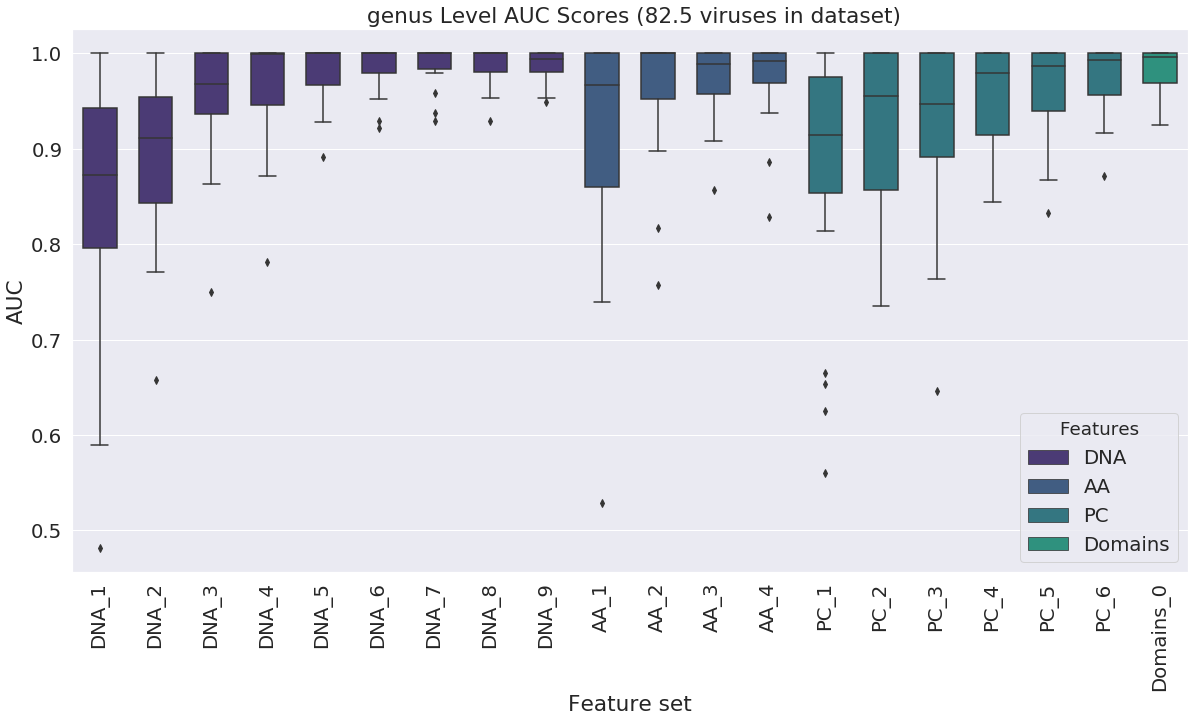

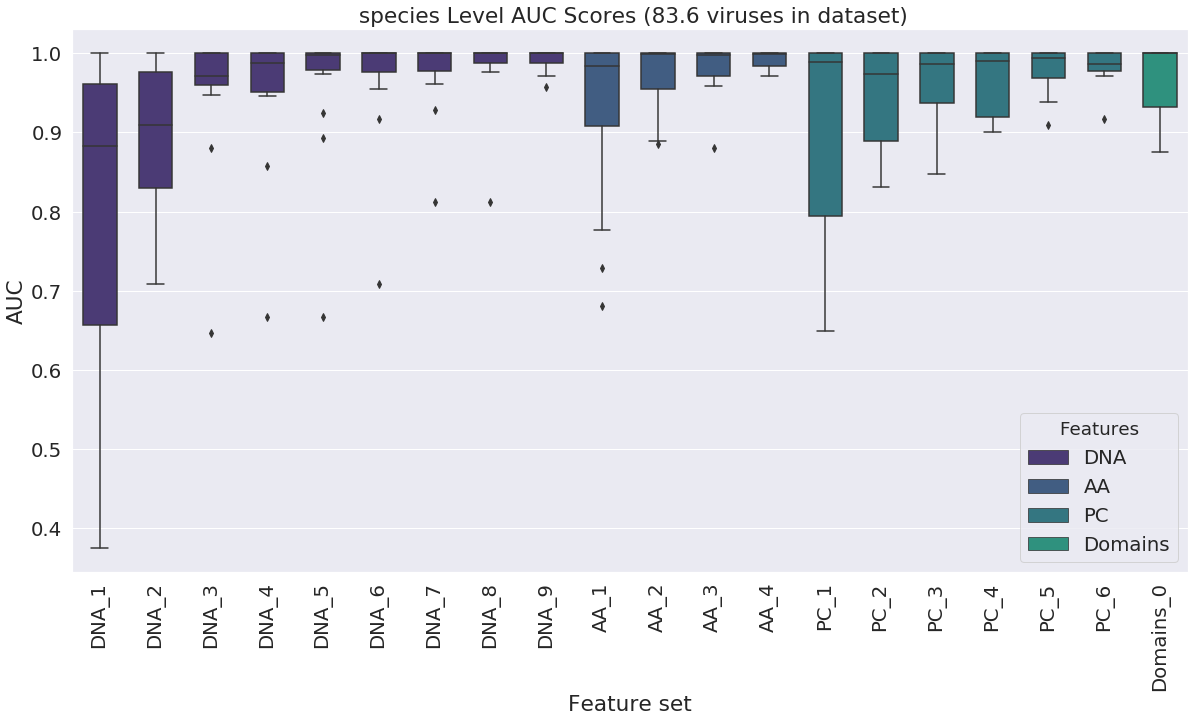

In [51]:
taxlevels = ['phylum','class','order','family','genus','species']
for i, t in enumerate(taxlevels):
    
    ss= df[df.tax == t]
    print('length',len(ss))
    nds =len(set(ss['Dataset']))
    
    #results_p = df[df.tax == t[0]]
    n =round(s.mean(list(set(ss['N in class']))),1)
    sns.set(font_scale=1.8, palette = 'viridis')
    #grid.map(sns.boxplot, x='Feature set',y= "AUC",hue = "k" ,saturation =1,  width =0.9, data = results)
    f, ax = plt.subplots(figsize=(20, 10))
    plt.xticks(rotation='vertical')
    plt.title(f' {taxlevels[i]} Level AUC Scores ({n} viruses in dataset)')
    b = sns.boxplot( x = 'Feature set', y ='AUC', hue = 'Features',width =0.6,linewidth =1.5,dodge = False, 
                ax =ax, data = ss)

# sp = sns.swarmplot(data = results_p,x = 'Feature set',
#                      y = 'AUC',hue = 'Features',
#                     size = 3, dodge = True)

#    f.savefig(f'Figures/{taxlevels[i]}_bxplt_Bact_DNA.png')

In [70]:
concat_ds = lambda row: f'{row["tax"][0]}_{row["label"]}'
df['Dataset']= df.apply(concat_ds , axis=1)
list(df1['Dataset'])[:10]

['p_Bacteroidetes',
 'p_Proteobacteria',
 'p_Actinobacteria',
 'p_Actinobacteria',
 'p_Actinobacteria',
 'p_Actinobacteria',
 'p_Actinobacteria',
 'p_Actinobacteria',
 'p_Actinobacteria',
 'p_Actinobacteria']

In [75]:
df1 = df.sort_values('tax')
unique =[]
[unique.append(ds) for ds in(list(df1['Dataset']))if ds not in unique ]


df2 = df1.pivot('Dataset','Feature set', 'AUC').reindex(unique)

df2.head()

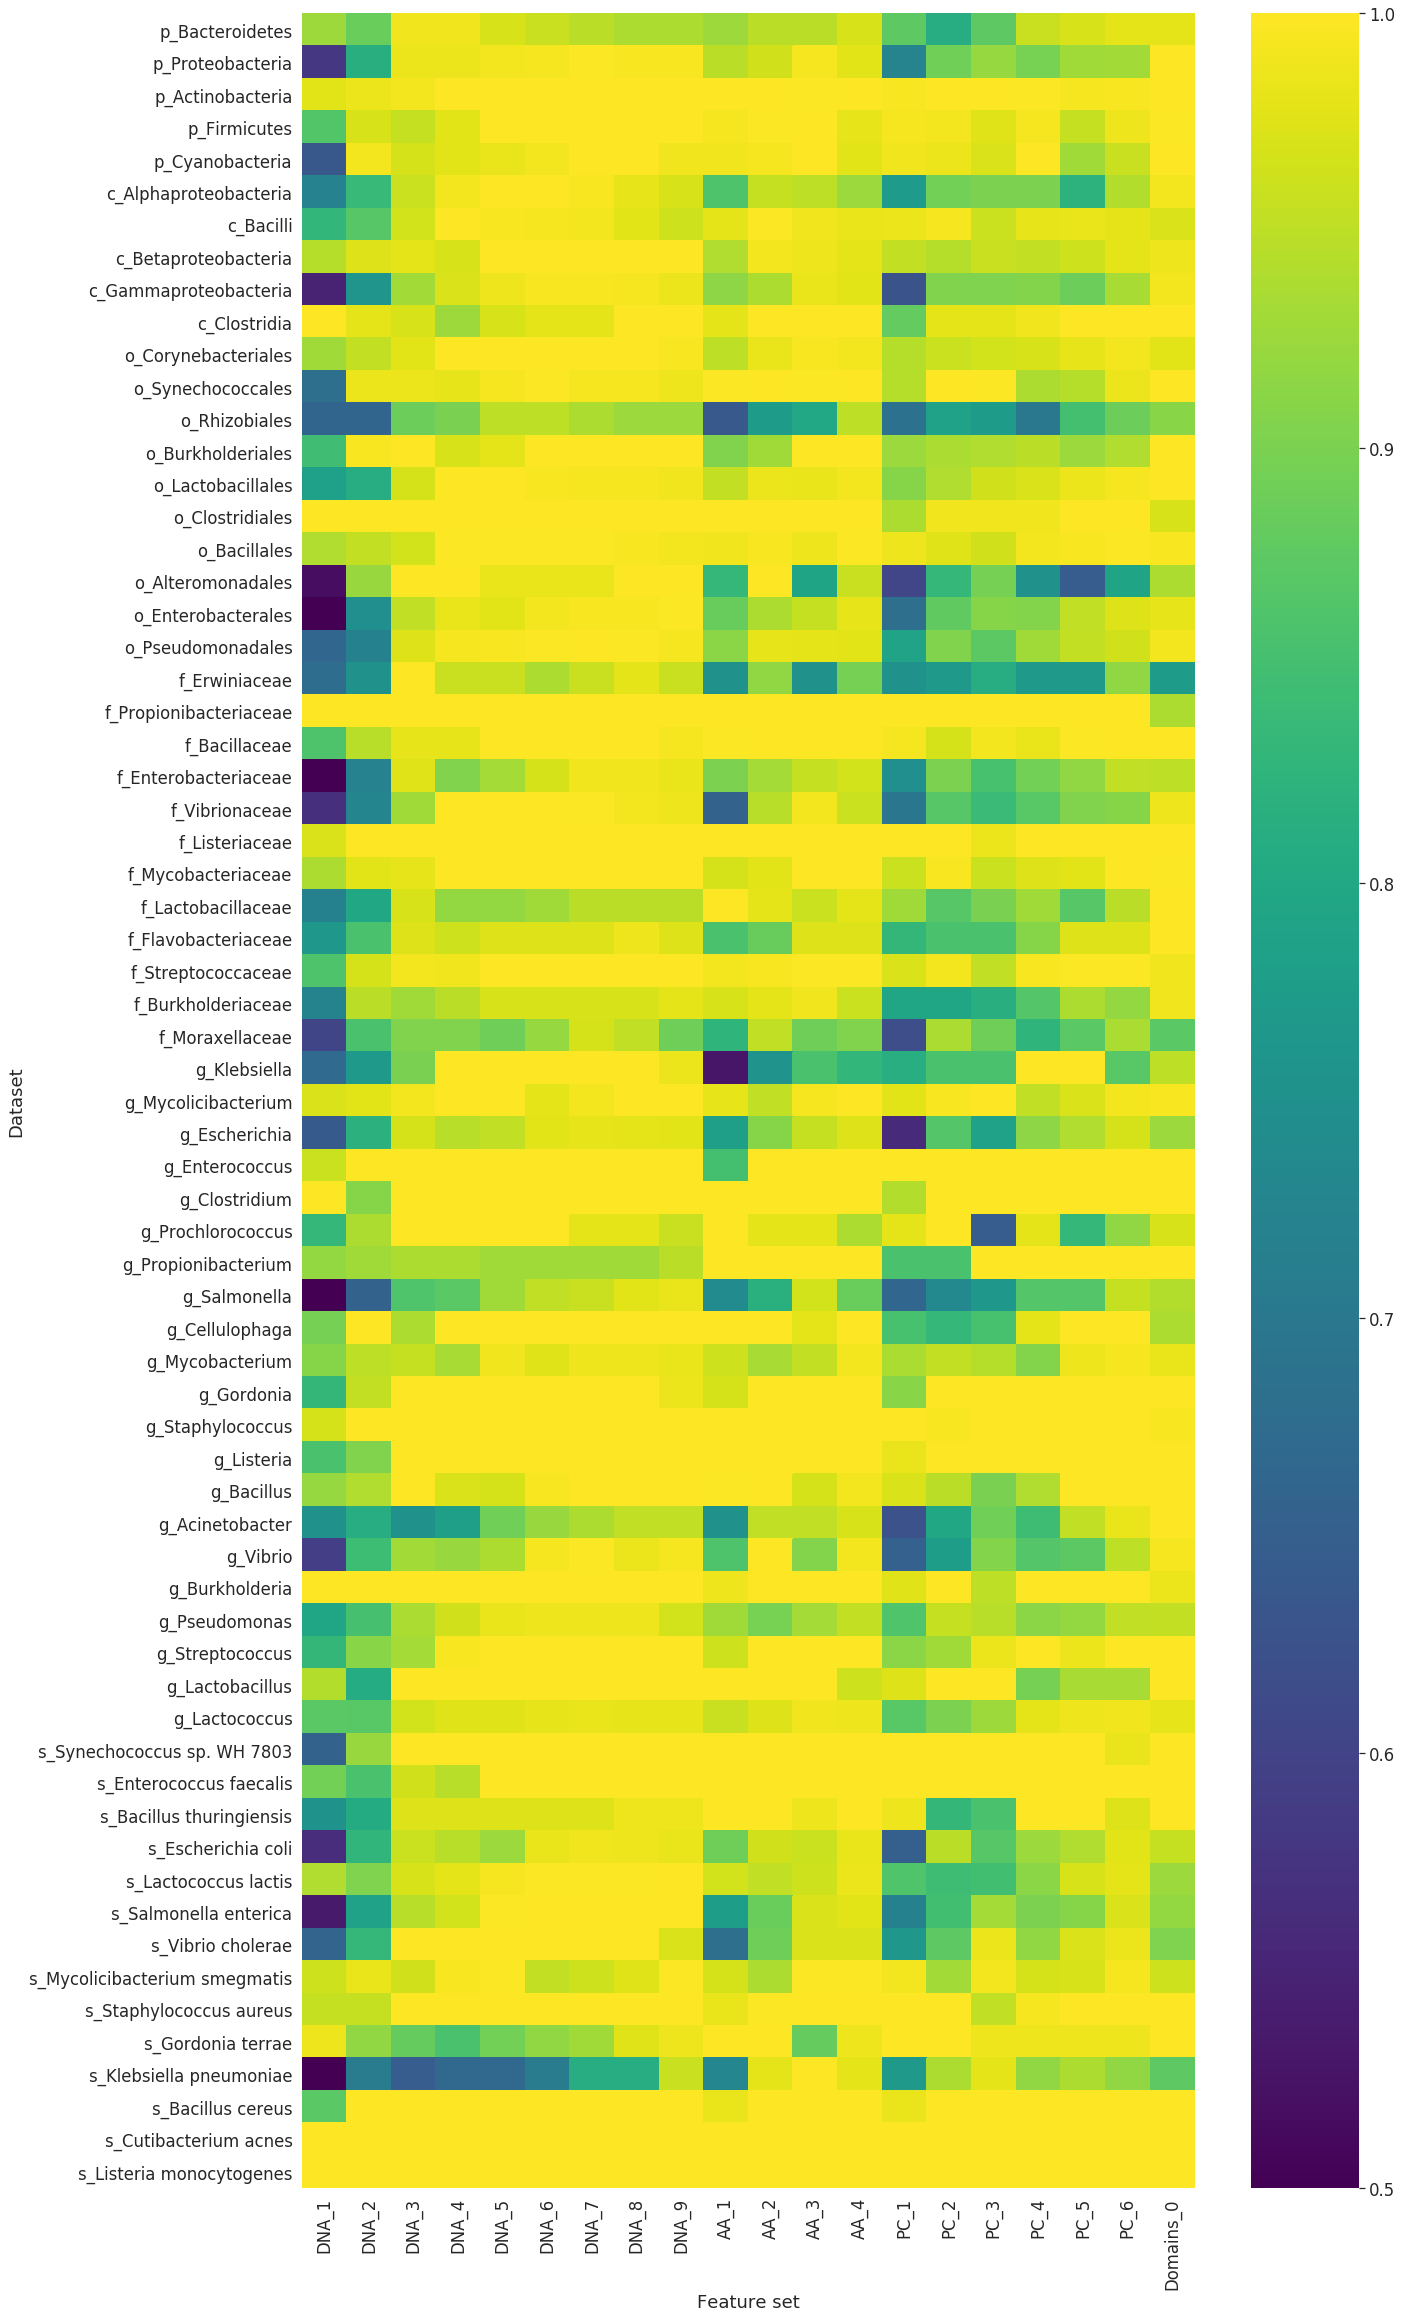

In [76]:
# Draw a heatmap with the numeric values in each cell
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(20, 40))

sns.heatmap(df2,cmap = 'viridis', vmin = 0.5,   ax=ax)
#f.savefig('Figures/heatmap_Bact.svg', bbox_inches="tight")